In [1]:
# Author: Samantha Tetef
# Created: 12.11.20
# Title: Dat_to_Spectra

In [2]:
from my_python_module import *

In [3]:
%%javascript
 IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
 }

<IPython.core.display.Javascript object>

In [4]:
ROOTDIR = os.getcwd().replace('\\', '/')

CIDdir = f"{ROOTDIR}/ProcessedData/"

CIDS = np.array([int(f) for f in os.listdir(CIDdir)])

XES_DATA = get_Data(CIDS, directory='XES')
XANES_DATA = get_Data(CIDS, directory='XANES')

In [5]:
xes = np.array(get_Property(XES_DATA, 'Spectra'))
XESenergy = xes[0,0,:]
XES = xes[:,1,:]

XES = XES/np.max(XES)

In [6]:
xanes = np.array(get_Property(XANES_DATA, 'Spectra'))
XANESenergy = xanes[0,0,:]
XANES = xanes[:,1,:]

XANES = XANES/np.max(XANES)

# The Dataset

In [7]:
print(CIDS)

[  105   106 11776 13097   150   186   208   216   278   339   378   466
   529   546   572   587    59   654   668   669   724  8289 99058 99241
 99791 99928]


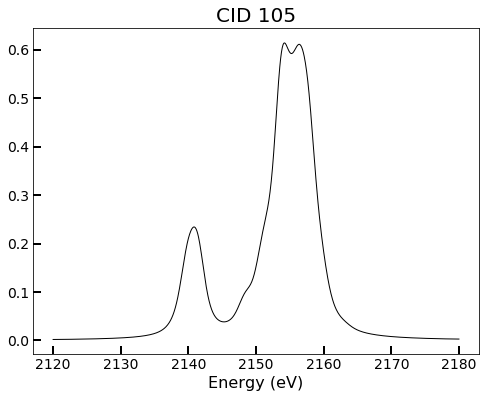

In [8]:
i = 0
plot_spectrum([XESenergy, XES[i]], f'{CIDS[i]}')

In [9]:
def esnip(trans, emin):
    x,y = trans
    for i, e in enumerate(x):
        if e >= emin:
            break
    x = x[i:]
    y = y[i:]
    
    if x[-1] < 0:
        return x[:-1], y[:-1]
    
    return x, y

C:\Users\saman\Desktop\P ML\Data Analysis\my_python_module\__init__.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = ax.stem(xs, ys / max(ys), linefmt='r-', markerfmt='ro')


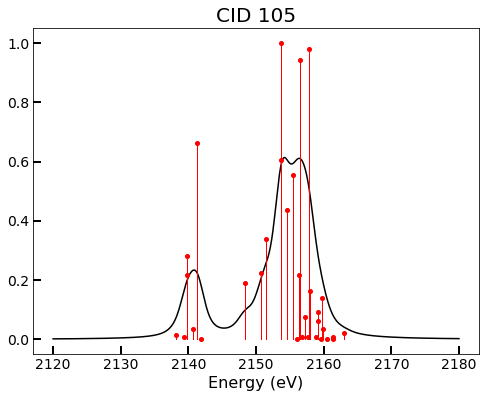

In [10]:
i = 0
trans = XES_DATA[i]['Transitions']
trans = esnip(trans, 2100)
plot_spectrum_and_trans([XESenergy, XES[i]], trans, f'{CIDS[i]}')

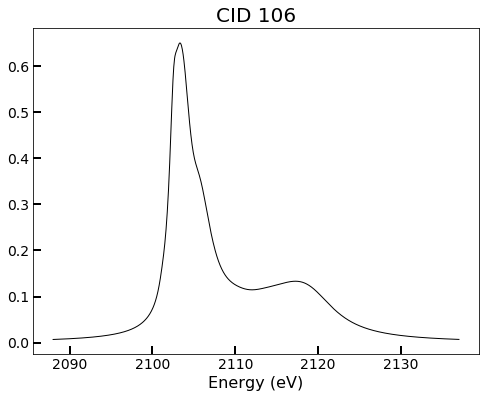

In [11]:
i = 1
plot_spectrum([XANESenergy, XANES[i]], f'{CIDS[i]}')

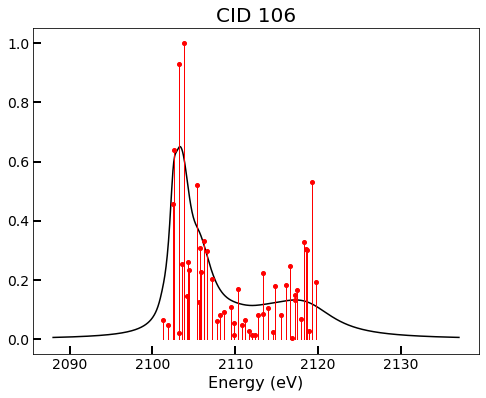

In [12]:
i = 1
plot_spectrum_and_trans([XANESenergy, XANES[i]], XANES_DATA[i]['Transitions'], f'{CIDS[i]}')